In [392]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [393]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [394]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cuda


## train_DS 와 test_DS

In [395]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = "/content/drive/MyDrive/파이토치/data", train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = "/content/drive/MyDrive/파이토치/data", train=False, download=True, transform=transform)

In [396]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/파이토치/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/파이토치/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [397]:
train_DS.classes # . 뒤에서 탭 하면 이것저것 볼 수 있는 게 뜬다

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [398]:
train_DS.class_to_idx
"""
'0 - zero' : 0
클래스 명 : 클래스에 대한 레이블
"""

"\n'0 - zero' : 0 \n클래스 명 : 클래스에 대한 레이블\n"

In [399]:
train_DS.data.shape # # Python는 이미지 데이터라면 4D로 전환해서 사용해야 함

torch.Size([60000, 28, 28])

In [400]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

torch.Size([28, 28])


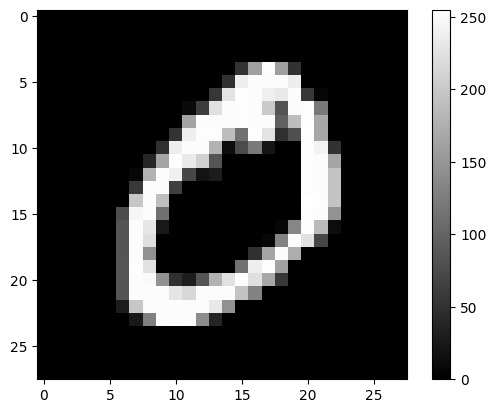

In [401]:
print(train_DS.data[1].shape)
plt.imshow(train_DS.data[1], cmap='gray')
plt.colorbar()

In [402]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader

In [403]:
BATCH_SIZE = 32 # 보통 2의 제곱으로

# drop_last=False → 313개 배치 (312×32 + 1×16 = 10000개 전부 사용)
# drop_last=True  → 312개 배치 (312×32 = 9984개만 사용, 마지막 16개는 버림)
# 기본값 drop_last=False

train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [404]:
train_DL.dataset # 데이터 로더 만 있으면 데이터셋도 같이 있는 셈

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/파이토치/data
    Split: Train
    StandardTransform
Transform: ToTensor()

<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
torch.Size([28, 28])

<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.float32
torch.Size([1, 28, 28])

tensor(1)


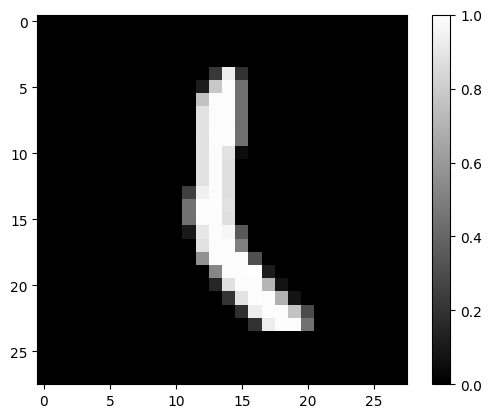

In [405]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 # next(iter(train_DS)) 는 한장만 꺼내기 -> next(iter(x)) = "x에서 첫 번째 요소 꺼내기"
"""
ToTensor 의 역할
1. tensor로 바꾸고
2. 개채행열로 바꾸고 : 흑백이면 채 는 1, 칼라이면 3
3. 0 ~ 1 사이로 바꾸고 (int -> float)
"""
print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
print(train_DS.data[0].shape)
print()
print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0].shape)
print()
# print(x_batch[0].squeeze().shape)
plt.imshow(x_batch[1].squeeze(),cmap='gray')
plt.colorbar()
print(y_batch[1])

# print(y_batch.shape)

## model 만들기

In [406]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fcs = nn.Sequential(
            nn.Linear(28*28, 100),
            nn.ReLU(),
            nn.Linear(100, len(train_DS.classes))
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.fcs(x)
        return x

In [407]:
"""
nn.Linear는 shape이 채 또는 개채 또는 개개채 또는 개개개채 로 들어와야만 한다
지금은 x_batch를 개채행열 로 가지고 있음
그래서 개채 형태로 바꿔줘야 한다
torch.Size([32, 784]) : 784개의 모든 픽셀 값이 전부 다 채널 값(feature)이다
"""

# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)

flat_images = torch.flatten(x_batch)
print(flat_images.shape) # print(32*1*28*28)

flat_images2 = torch.flatten(x_batch, start_dim=1)
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [408]:
model=MLP().to(DEVICE)
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch.to(DEVICE)).shape)

MLP(
  (fcs): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


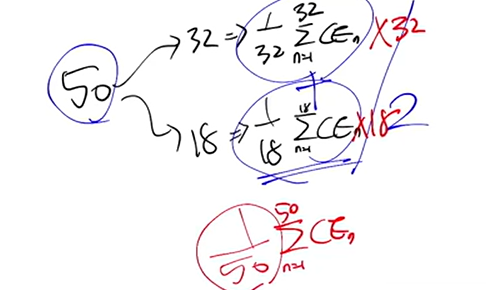

In [409]:
from torch import optim

LR = 1e-3
EPOCH=5
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

def Train(model, train_DL, criterion, optimizer, EPOCH):
    loss_history = []
    NoT=len(train_DL.dataset) # The number of training data

    model.train() # train model로 전환
    ch = 0
    for ep in range(EPOCH):
        rloss = 0 # running loss: 배치 마다 loss 누적해서 전체 데이터에 대해서의 loss값 구하기, # 매 에폭마다 초기화
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)

            # inference
            y_hat = model(x_batch)

            # loss
            loss = criterion(y_hat, y_batch)

            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update

            # loss 누적 (배치 평균 loss × 배치 크기)
            # loss.item() : 현재 배치에 대한 CrossEntropy 평균값
            loss_b = loss.item() * x_batch.shape[0] # 배치 평균 loss에 실제 배치 크기를 곱해 전체 loss로 변환
            # 총 배치 개수 = ceil(60000 / 32) = ceil(1875) = 1875 (한 에폭(epoch) 동안 반복문이 도는 횟수)
            rloss += loss_b # 현재 에폭(epoch) 동안의 누적 loss 합계 (모든 배치의 loss_b 누적)

        # print loss
        loss_e = rloss/NoT # 현재 에폭(epoch) 전체 데이터에 대한 평균 loss (총합 / 전체 샘플 수), # 위 그림에서 빨간색으로 된 1/50 부분을 나타냄
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {loss_e:.4f}")
        print("-"*20)

    return loss_history



Epoch: 1, train loss: 0.3085
--------------------
Epoch: 2, train loss: 0.1427
--------------------
Epoch: 3, train loss: 0.0981
--------------------
Epoch: 4, train loss: 0.0749
--------------------
Epoch: 5, train loss: 0.0594
--------------------


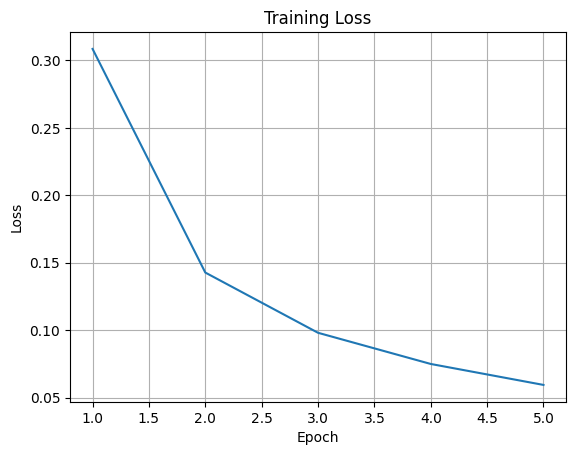

In [410]:
loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)
# return loss_history
plt.plot(range(1, EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid()

## Cross Entropy 확인 (왜 모델에 softmax를 사용하지 않았을까?)

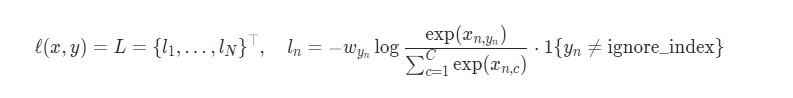

In [411]:
"""
실제 CrossEntropy 계산에는 softmax를 포함하고 있지는 않지만
Pytoch에서 nn.CrossEntropyLoss()에 softmax를 포함하도록 구현되어 있음
"""

'\n실제 CrossEntropy 계산에는 softmax를 포함하고 있지는 않지만 \nPytoch에서 nn.CrossEntropyLoss()에 softmax를 포함하도록 구현되어 있음\n'

In [412]:
# cross entropy 구하는 여러가지 방법

import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
# print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전

y_batch = torch.randint(5, (3,)) # 0 ~ 5 미만의 정수 중에서 3개를 랜덤하게 생성해서 1차원 텐서로 반환
# print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax가 내장
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax가 내장
print(criterion(y_hat, y_batch))

# 방법 3
"""
nn.Softmax(dim=1)
각 행(row)별로 softmax를 적용
즉, 각 샘플마다 5개 클래스 점수를 확률로 변환
이 확률들의 합은 1이 되고, 가장 큰 확률이 모델의 예측 클래스가 된다
"""
soft = nn.Softmax(dim=1)
y_hat_soft = soft(y_hat)
# print()
# print(y_hat_soft.shape)
loss = 0
for i, val in enumerate(y_hat_soft):
    # print(i, val)
    loss += -torch.log(val[y_batch[i]])
print(loss/len(y_hat_soft))

tensor(1.5647)
tensor(1.5647)
tensor(1.5647)


## 모델 저장하기 & 불러오기

In [413]:
save_model_path = "/content/drive/MyDrive/파이토치/result/MLP.pt"
torch.save(model.state_dict(), save_model_path)

In [414]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU로 학습했던거 현재 device로 불러올 수 있음

<All keys matched successfully>

## 모델 테스트

In [415]:
def Test(model, test_DL):
    model.eval() # test mode로 전환
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)

            # inference
            y_hat = model(x_batch)
            # print(y_hat)
            # print(y_hat.shape)
            # break

            # corrects accumulation
            pred = y_hat.argmax(dim=1)
            # print(y_hat.shape)
            # print(pred.shape)
            # break

            corrects_b = torch.sum(pred == y_batch).item() # torch.eq(pred, y_batch).sum().item()
            # print(pred) # 예측
            # print(y_batch) # 정답
            # print(pred == y_batch)
            # print(torch.sum(pred == y_batch).item())
            # break
            rcorrect += corrects_b

        accuracy_e = rcorrect/len(test_DL.dataset) *100

    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({accuracy_e:.1f} %)")
    return round(accuracy_e, 1)


In [416]:
Test(load_model, test_DL)

Test accuracy: 9728/10000 (97.3 %)


97.3

In [417]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL)) # 하나의 배치만 가져옴
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)
        # print(pred)

    x_batch = x_batch.to("cpu")

    """
    imshow()는 (Height, Width, Channel) 형식인 (H, W, C)을 요구

    x_batch[0].shape = (1, 28, 28)  # (채널 수=1, 높이, 너비)
    흑백 이미지	shape = (1, H, W) → .squeeze() → (H, W)로 변경
    RGB 이미지	shape = (3, H, W) → .permute(1, 2, 0) → (H, W, 3)로 변경
    """
    # print(x_batch[0].shape) # torch.Size([1, 28, 28])
    # print(x_batch[0].permute(1,2,0).shape) # torch.Size([28, 28, 1])
    # print(x_batch[0].permute(1,2,0).squeeze().shape) # torch.Size([28, 28])


    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap='gray')
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color='b' if pred_class == true_class else 'r')

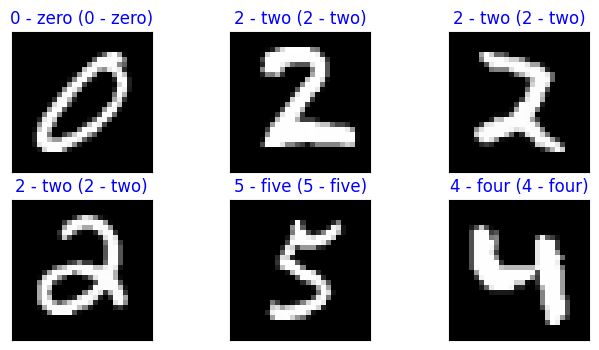

In [418]:
Test_plot(model, test_DL)

In [419]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [420]:
print(count_params(load_model))

79510


## confusion matrix

In [421]:
def get_conf(model, test_DL):
    N = len(test_DL.dataset.classes)
    model.eval()
    with torch.no_grad():
        confusion = torch.zeros(N,N)
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)

            # inference
            y_hat = model(x_batch)

            # accuracy
            pred = y_hat.argmax(dim=1)
            """
            1. N: 클래스 수 (예: 10)
            2. y_batch.cpu(): 실제 레이블을 CPU 텐서로 변환
            3. pred.cpu(): 예측 레이블을 CPU 텐서로 변환
            4. N * y_batch.cpu() + pred.cpu():
            - (실제 클래스, 예측 클래스) 쌍을 단일 인덱스로 변환 (예: 실제=2, 예측=1 → 21)
            5. torch.bincount(..., minlength=N**2):
            - 각 인덱스 별 등장 횟수를 세어, 길이 N^2인 1차원 텐서 생성(길이 100인 1차원 배열)
            - 예를 들어, 인덱스 12는 혼동 행렬에서 1행(실제 클래스 1), 2열(예측 클래스 2)을 의미
            - minlength 옵션으로 특정 조합이 없더라도 크기를 N^2로 고정
            6. .reshape(N, N):
            - 1차원 텐서를 N×N 크기의 혼동 행렬 형태로 변환
            7. confusion += ...:
            - 이전 배치까지 계산된 혼동 행렬에 이번 배치 결과를 누적 합산

            결과적으로 이 코드는 배치 단위로 나온 (실제, 예측) 쌍의 개수를 모아서
            전체 데이터에 대한 혼동 행렬을 누적 계산하는 역할을 한다
            """
            confusion += torch.bincount(N * y_batch.cpu() + pred.cpu(), minlength=N**2).reshape(N,N)
            # confusion matrix는 무조건 10X10이 되어야 하는데 만약 마지막 label에 대해서 예측을 모두 실패하면 100개보다 작아질 수 있기 때문에 minlength를 설정
    confusion = confusion.numpy()
    return confusion


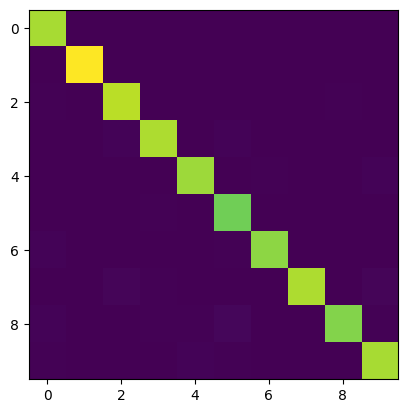

In [422]:
confusion = get_conf(load_model, test_DL)
plt.imshow(confusion)

In [435]:
import numpy as np

def plot_confusion_matrix(confusion, classes=None):
    N = confusion.shape[0]
    print(N)

    # np.trace()은 행렬의 대각 원소들의 합을 계산
    accuracy = np.trace(confusion)/np.sum(confusion)*100
    print(accuracy)

    # confusion = confusion/np.sum(confusion, axis=1)
    plt.figure(figsize=(10,7))
    plt.imshow(confusion, cmap='Blues')
    plt.title("confusion matrix")
    plt.colorbar()

    for i in range(N):
        for j in range(N):
            plt.text(j, i, round(confusion[i,j]),
                    horizontalalignment="center", fontsize=10,
                    color="white" if confusion[i,j] > np.max(confusion) / 1.5 else "black")


    if classes is not None:
        plt.xticks(range(N), classes)
        plt.yticks(range(N), classes)
    else:
        plt.xticks(range(N))
        plt.yticks(range(N))

    plt.xlabel(f"Predicted label \n accuracy = {accuracy:.1f} %")
    plt.ylabel("True label")

10
97.28


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0 - zero'),
  Text(1, 0, '1 - one'),
  Text(2, 0, '2 - two'),
  Text(3, 0, '3 - three'),
  Text(4, 0, '4 - four'),
  Text(5, 0, '5 - five'),
  Text(6, 0, '6 - six'),
  Text(7, 0, '7 - seven'),
  Text(8, 0, '8 - eight'),
  Text(9, 0, '9 - nine')])

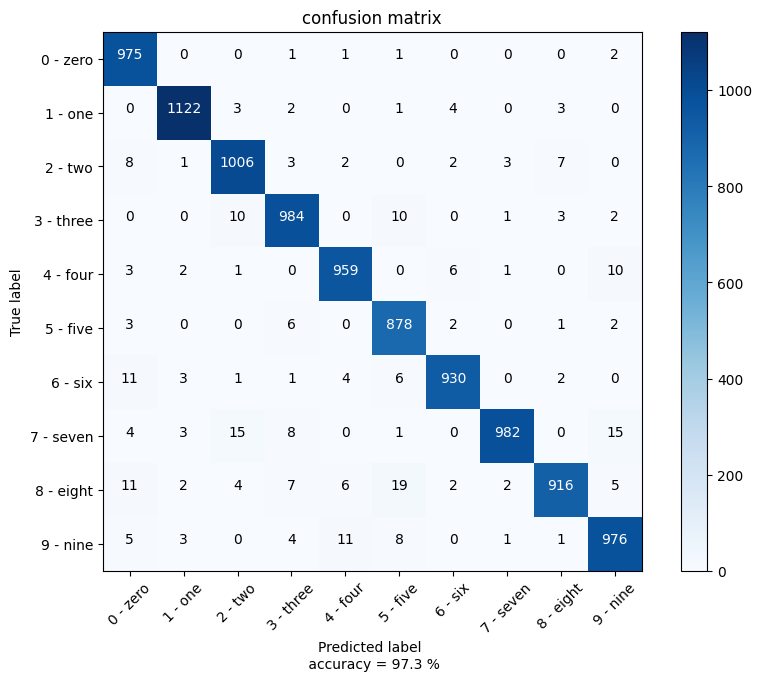

In [436]:
confusion = get_conf(load_model, test_DL)
plot_confusion_matrix(confusion, test_DL.dataset.classes)
plt.xticks(rotation=45)